# Project 2: Group 4
## Exploratory Data Analysis (EDA)

In [17]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [18]:
# Load Data
df = pd.read_csv("input/cardataset/data.csv")
# To display the top 5 rows 
df.head(5)   

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
# List the different types of data
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### Goals for EDA
We'd like to understand how the make up and branding of a car correlates with popularity \
Irrelevant columns: Engine Cylinders, Engine Fuel Type, Engine HP, Transmission Type 

In [20]:
# Drop irrelevant columns
df = df.drop(['Engine Fuel Type', 'Engine Cylinders', 'Engine HP', 'Transmission Type'], axis=1)
df.head(5)

,Make,Model,Year,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [21]:
# Rename columns
df = df.rename(columns={"Driven_Wheels": "Drive Type","highway MPG": "MPG:H", "city mpg": "MPG:C", "MSRP": "List Price" })
df.head(5)

,Make,Model,Year,Drive Type,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG:H,MPG:C,Popularity,List Price
0,BMW,1 Series M,2011,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [22]:
# List number of duplicate rows
print("Before: number of rows: ", df.shape)

# Drop the duplicates
df = df.drop_duplicates()
print("After: number of rows: ", df.shape)

# Drop Missing/Null Values
print("Sum of null values: ", df.isnull().sum())
df = df.dropna()    # Dropping the missing values.
df.count()



Before: number of rows:  (11914, 12)
After: number of rows:  (11174, 12)
Sum of null values:  Make                  0
Model                 0
Year                  0
Drive Type            0
Number of Doors       6
Market Category    3361
Vehicle Size          0
Vehicle Style         0
MPG:H                 0
MPG:C                 0
Popularity            0
List Price            0
dtype: int64


Make               7807
Model              7807
Year               7807
Drive Type         7807
Number of Doors    7807
Market Category    7807
Vehicle Size       7807
Vehicle Style      7807
MPG:H              7807
MPG:C              7807
Popularity         7807
List Price         7807
dtype: int64

In [23]:
display("Head", df.head(5))
display("Tail", df.tail(5))

'Head'

,Make,Model,Year,Drive Type,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG:H,MPG:C,Popularity,List Price
0,BMW,1 Series M,2011,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


'Tail'

,Make,Model,Year,Drive Type,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG:H,MPG:C,Popularity,List Price
11909,Acura,ZDX,2012,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


<Axes: xlabel='MPG:H'>

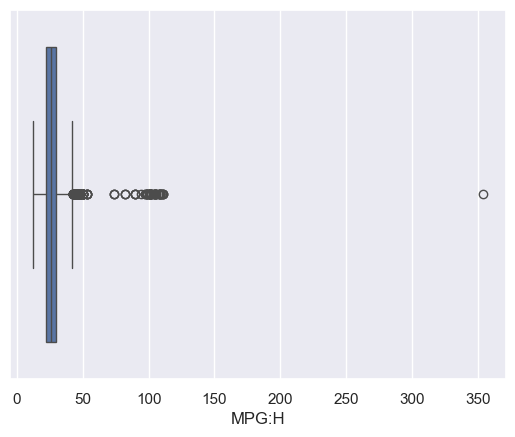

In [24]:
# Detect and remove outliers
# Let's take a look at MPG:H, MPG:C, Populatiry, and List Price
sns.boxplot(x=df['MPG:H'])

<Axes: xlabel='MPG:C'>

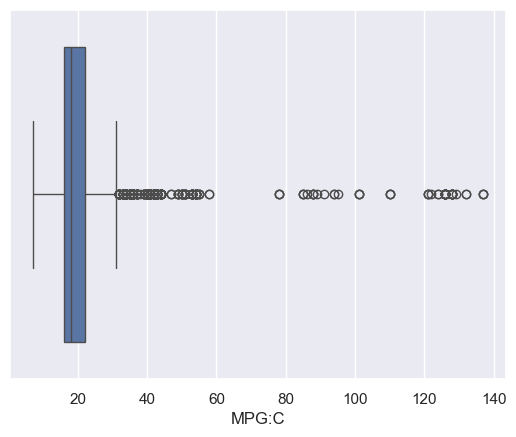

In [25]:
sns.boxplot(x=df['MPG:C'])


<Axes: xlabel='Popularity'>

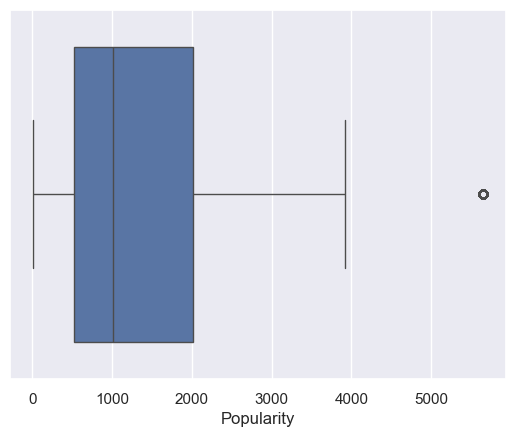

In [26]:
sns.boxplot(x=df['Popularity'])

<Axes: xlabel='List Price'>

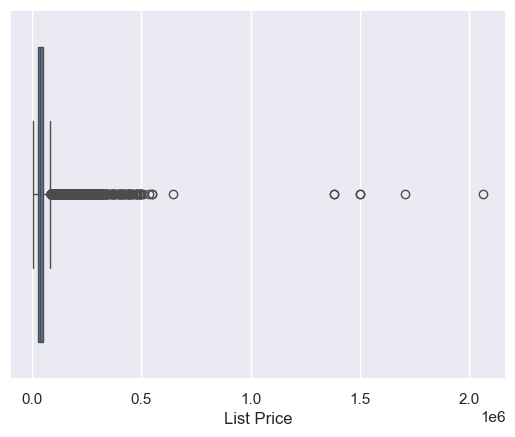

In [27]:
sns.boxplot(x=df['List Price'])

In [28]:
# Now let's remove outliers from these columns
# By setting numeric_only=True, we're only looking at the columns with numeric data and removing those outliers

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

Year                   6.0
Number of Doors        2.0
MPG:H                  8.0
MPG:C                  6.0
Popularity          1481.5
List Price         23185.0
dtype: float64


In [29]:
# Now let's remove the outliers

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Reindex Q1, Q3, and IQR to match the columns in numeric_df
Q1 = Q1.reindex(numeric_df.columns)
Q3 = Q3.reindex(numeric_df.columns)
IQR = IQR.reindex(numeric_df.columns)

# Create the mask using the reindexed values and align it with df's index
mask = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
mask = mask.reindex(df.index, fill_value=False)

# Apply the mask to the original df
df = df[mask]
df.shape

(5669, 12)